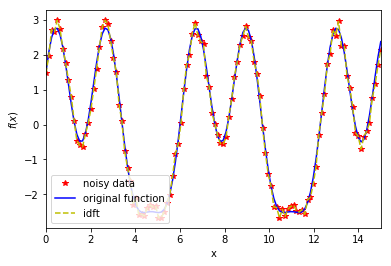

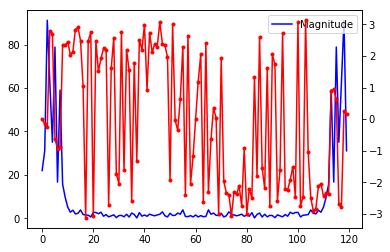

In [49]:
import numpy as np
import matplotlib.pyplot as plt 
from cmath import exp, pi

with open("data1.txt") as f:
    data = f.read

def dft(y):
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

def idft(c):
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*exp(2j*pi*k*n/N)
    return y

f = lambda x: 2*np.sin(x) + 1.5*np.cos(2*x) + np.sin(3*x)
    
a,b = 0,15
npoints = 120

x = np.linspace(a,b,npoints)
y = f(x) + 0.5*(np.random.rand(npoints) - 0.5)

c = dft(y)
y1 = idft(c).real/npoints

plt.plot(x,y,'r*', label='noisy data')
plt.plot(x,f(x), 'b-', label='original function')
plt.plot(x,y1, 'y--', label='idft')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(np.abs(c), 'b-', label='Magnitude')

ax2 = ax1.twinx()
ax2.plot(np.angle(c), 'r.-', label='Phase')
ax1.legend(loc='upper left')
ax1.legend(loc='upper right')
plt.show()